In [1]:
import torch
import torchvision
from PIL import Image
from particle_swarm import RandomSearch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = RandomSearch(20,{'x':[-.15,.15],'y':[-.15,.15],'scale':[.75,1.25],'theta':[-10,10]},max_iters=100)

In [3]:
X,Y = Image.open('socks_101643_crop_of_subject.png'),Image.open('socks_101643_final.png')
X,Y = torchvision.transforms.ToTensor()(X)[:-1],torchvision.transforms.ToTensor()(Y)[:-1]

In [4]:
best,best_params = model(X,Y)

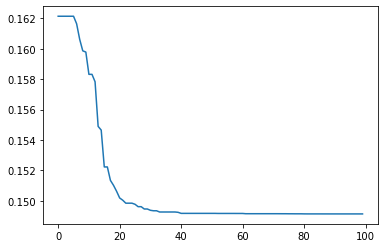

In [5]:
plt.plot(best)

In [6]:
T = model.transform(X,params=best_params)

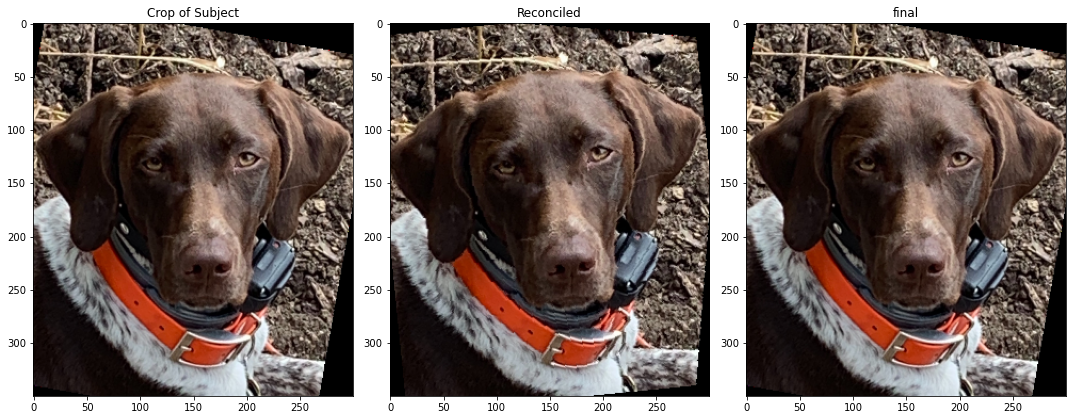

In [7]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.imshow(X.permute(1,2,0))
plt.title('Crop of Subject')

plt.subplot(1,3,2)
plt.imshow(T.permute(1,2,0))
plt.title('Reconciled')

plt.subplot(1,3,3)
plt.imshow(Y.permute(1,2,0))
plt.title('final')

plt.tight_layout()

In [8]:
best_params

[tensor(0.0215), tensor(-0.0002), tensor(1.0154), tensor(-5.6074)]

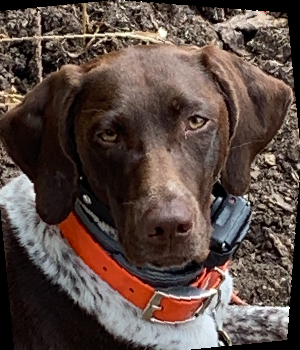

In [11]:
import  torchvision.transforms as tr
#.ToPILImage
tensor_to_pil = tr.ToPILImage()(T.squeeze_(0))
(tensor_to_pil)
